# Netflix Subscriptions Data Analysis

The data was downloaded from Kaggle:https://www.kaggle.com/prasertk/netflix-subscription-price-in-different-countries

The dataset contains details on Netflix subsription fees and content offerings across several countries where Netflix services are available. 

<i>Note: The dataset does not include ALL countries where Netflix operates. </i>

## Goal
Determining where Netflix customers potentially experience the most satisfaction from their subscription. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Read the file
netflix_df = pd.read_csv('netflix dec 2021.csv')

In [3]:
netflix_df.head()

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26
1,au,Australia,6114,4050,2064,7.84,12.12,16.39
2,at,Austria,5640,3779,1861,9.03,14.67,20.32
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99


In [4]:
netflix_df.columns

Index(['Country_code', 'Country', 'Total Library Size', 'No. of TV Shows',
       'No. of Movies', 'Cost Per Month - Basic ($)',
       'Cost Per Month - Standard ($)', 'Cost Per Month - Premium ($)'],
      dtype='object')

## Checking for Missing Values

In [5]:
#Checking the entire data frame for missing values
netflix_df.isna().any().any()

False

## Creating new features

In this stage we are adding new features that will provide more insight into the data.

### Region 
We will identify the region each country falls under based on the country code.

In [6]:
import pycountry_convert as pc

#Creating a function to identify the continent from the country code
def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

#Creating a column to indicate the continent for each country
netflix_df['Region'] = netflix_df['Country'].apply(lambda country_name: country_to_continent(country_name))

netflix_df.head()

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),Region
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26,South America
1,au,Australia,6114,4050,2064,7.84,12.12,16.39,Oceania
2,at,Austria,5640,3779,1861,9.03,14.67,20.32,Europe
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32,Europe
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99,South America


To make the Dataframe more readable we can move the "Region" column right after the "Country" column

In [7]:
#Creating a function to reposition columns
def movecol(df, cols_to_move=[], ref_col='', place='After'):
    
    #cols_to_move can be one or more columns we wish to move
    #ref_col is the column after or before which we want to reposition the column(s)
    
    cols = df.columns.tolist()
    if place == 'After':
        seg1 = cols[:list(cols).index(ref_col) + 1]
        seg2 = cols_to_move
    if place == 'Before':
        seg1 = cols[:list(cols).index(ref_col)]
        seg2 = cols_to_move + [ref_col]
    
    seg1 = [i for i in seg1 if i not in seg2]
    seg3 = [i for i in cols if i not in seg1 + seg2]
    
    return(df[seg1 + seg2 + seg3])

In [8]:
netflix_df = movecol(netflix_df, cols_to_move=['Region'], ref_col='Country', place='After')

### Value for Money

We will examine the relationship between the amount of content available and the basic subscription cost to determine which customers receive the most value for money.

A higher score indicates that the customers can access more content per dollar spent on their Basic Netflix Subsciption.

In [9]:
netflix_df['Value for Money'] = (netflix_df['Total Library Size']/netflix_df['Cost Per Month - Basic ($)']).round()

# Exploratory Data Analysis

In this stage, we will examine the data to identify any patterns, trends and relationships between the variables. It will help us analyze the data and extract insights that can be used to make decisions.

Data Visualization will give us a clear idea of what the data means by giving it visual context.

In [10]:
#Number of countries we have data for
len(netflix_df['Country'])

65

In [11]:
netflix_df['Region'].value_counts().to_frame()

,Region
Europe,34
Asia,12
South America,10
North America,6
Oceania,2
Africa,1


Text(0.5, 1.0, 'Netflix Worldwide Coverage by Region')

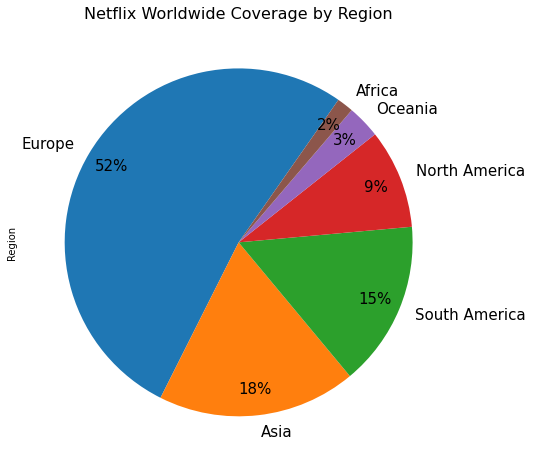

In [12]:
regions = netflix_df['Region'].value_counts()

regions.plot.pie(figsize=(8, 8), autopct='%1.0f%%',fontsize=15,labels=regions.index, pctdistance=0.85, startangle=55)
plt.title("Netflix Worldwide Coverage by Region", fontsize=16)

# autopct="%1.0f%%" shows the percentage to 0 decimal place 
# pctdistance controls how far the values appear from the center of the circle
# startangle controls the angle of the slices, allowing the pie chart to be rotated to improve readability

We have data on <b>65</b> countries where Netflix operates across <b>6 regions</b>.
- <b>Europe</b> represents the biggest region for Netlfix 
- <b>Africa</b> represents the smallest region for Netlfix

## Content

In [13]:
content_stats = netflix_df['Total Library Size'].describe().round().to_frame()
tv = netflix_df['No. of TV Shows'].describe().round()
movies = netflix_df['No. of Movies'].describe().round()
content_stats = pd.concat([content_stats, tv, movies], axis=1)
content_stats

,Total Library Size,No. of TV Shows,No. of Movies
count,65.0,65.0,65.0
mean,5314.0,3519.0,1795.0
std,980.0,723.0,327.0
min,2274.0,1675.0,373.0
25%,4948.0,3154.0,1628.0
50%,5195.0,3512.0,1841.0
75%,5952.0,3832.0,1980.0
max,7325.0,5234.0,2387.0


- The average library size is <b>5314</b> with an average of <b>3519 TV Shows</b> and <b>1795 Movies</b>
- The content library size varies between <b>2274 and 7425</b>, which indicates that there is a significant difference in what content a netflix customer can see based on where they are accessing Netflix from. 
- <b>75% of customers</b> have access to a libary of at least <b>4948 TV Shows and Movies</b>.

Text(0.5, 1.0, 'Total Netflix Content Library Size')

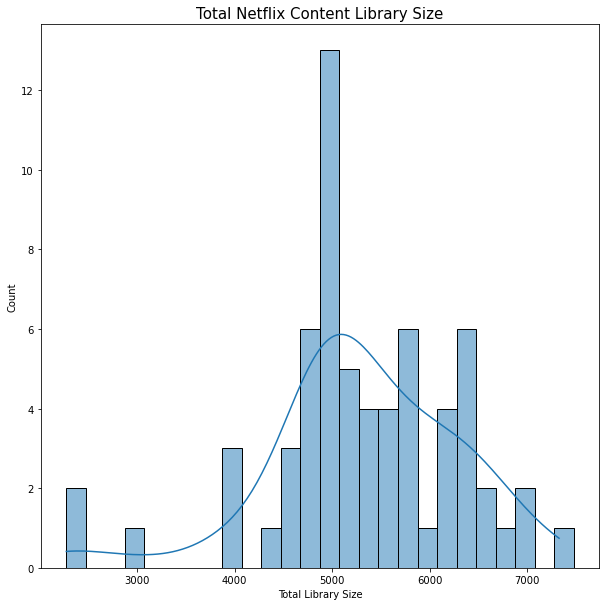

In [14]:
fig_dims = (10,10)
fig, ax = plt.subplots(figsize=fig_dims)

sns.histplot(data=netflix_df, x="Total Library Size",kde=True,binwidth=200)
plt.title("Total Netflix Content Library Size", fontsize=15)

In [15]:
netflix_content_stats_df = pd.DataFrame(columns = ['Description', 'Country', 'Total Library Size', 'No. of TV Shows', 'No. of Movies','Cost Per Month - Basic ($)', 'Cost Per Month - Standard ($)','Cost Per Month - Premium ($)'])

#Largest Library
max_lib = netflix_df[netflix_df['Total Library Size'] == netflix_df['Total Library Size'].max()]
max_lib.insert(0, "Description", "Largest Content Library", True)

#Smallest Library
min_lib = netflix_df[netflix_df['Total Library Size'] == netflix_df['Total Library Size'].min()]
min_lib.insert(0, "Description", "Smallest Content Library", True)

#Largest TV Library
max_tv = netflix_df[netflix_df['No. of TV Shows'] == netflix_df['No. of TV Shows'].max()]
max_tv.insert(0, "Description", "Largest Library of TV Shows", True)

#Smallest TV Library
min_tv = netflix_df[netflix_df['No. of TV Shows'] == netflix_df['No. of TV Shows'].min()]
min_tv.insert(0, "Description", "Smallest Library of TV Shows", True)

#Largest Movie Library
max_mov = netflix_df[netflix_df['No. of Movies'] == netflix_df['No. of Movies'].max()]
max_mov.insert(0, "Description", "Largest Library of Movies", True)

#Smallest Movie Library
min_mov = netflix_df[netflix_df['No. of Movies'] == netflix_df['No. of Movies'].min()]
min_mov.insert(0, "Description", "Smallest Library of Movies", True)

#Adding columns to empty dataframe
netflix_content_stats_df = pd.concat([netflix_content_stats_df, max_lib, min_lib, max_tv, min_tv, max_mov, min_mov], axis=0)

#Removing extra columns
netflix_content_stats_df = netflix_content_stats_df[['Description', 'Country', 'Total Library Size', 'No. of TV Shows', 'No. of Movies']]

netflix_content_stats_df

,Description,Country,Total Library Size,No. of TV Shows,No. of Movies
12,Largest Content Library,Czechia,7325,5234,2091
11,Smallest Content Library,Croatia,2274,1675,599
12,Largest Library of TV Shows,Czechia,7325,5234,2091
11,Smallest Library of TV Shows,Croatia,2274,1675,599
35,Largest Library of Movies,Malaysia,5952,3565,2387
49,Smallest Library of Movies,San Marino,2310,1937,373


As seen above, 
- <b>Czechia</b> has the Largest Content Library Overall and the Largest Library of TV Shows
- <b>Croatia</b> has the Smallest Content Library Overall and the Smallest Library of TV Shows
- <b>Malaysia</b> has the Largest Library of Movies
- <b>San Marino</b> has the Smallest Library of Movies

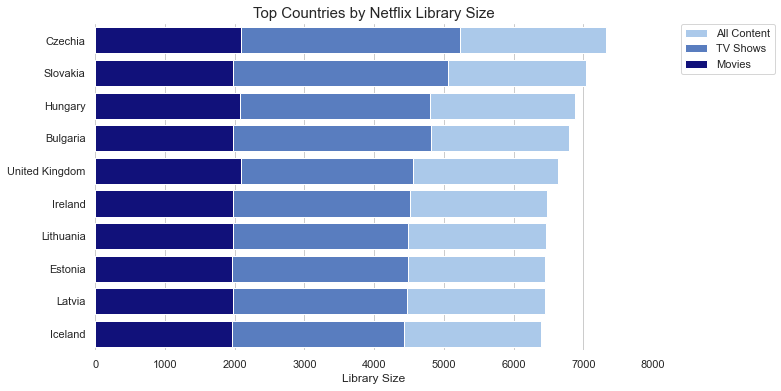

In [16]:
sns.set_theme(style="whitegrid")

fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)

#Creating a DataFrame with the Top 10 countires by library content
top_lib = netflix_df.sort_values(by=['Total Library Size'], ascending=False).head(10)

sns.set_color_codes("pastel")
sns.barplot(x=top_lib['Total Library Size'], y=top_lib['Country'], data=top_lib, label="All Content", color="b")
plt.title("Top Countries by Netflix Library Size", fontsize=15)

sns.set_color_codes("muted")
sns.barplot(x=top_lib['No. of TV Shows'], y=top_lib['Country'], data=top_lib, label="TV Shows", color="b")

sns.set_color_codes("pastel")
sns.barplot(x=top_lib['No. of Movies'], y=top_lib['Country'], data=top_lib, label="Movies", color="darkblue")

# Add a legend and informative axis label
ax.set(xlim=(0, 8000), ylabel="", xlabel="Library Size")
sns.despine(left=True, bottom=True)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In the top 10 countries by library size we see that the Movie content remains around 2000 and the main differentiator is the number of TV Shows available in each country. 

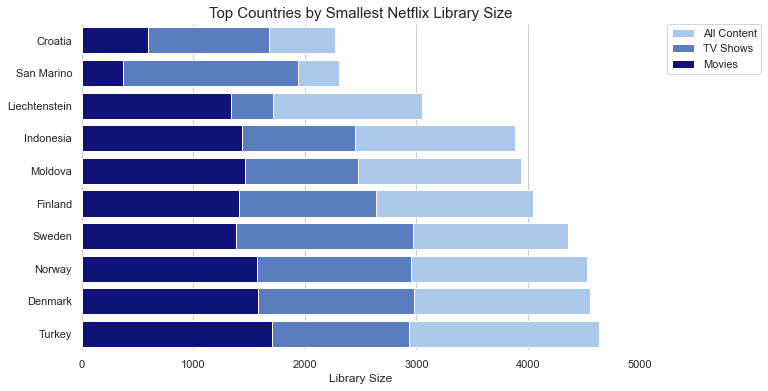

In [17]:
sns.set_theme(style="whitegrid")

fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)

#Creating a DataFrame with the Bottom 10 countires by library content
bot_lib = netflix_df.sort_values(by=['Total Library Size'], ascending=True).head(10)

sns.set_color_codes("pastel")
sns.barplot(x=bot_lib['Total Library Size'], y=bot_lib['Country'], data=bot_lib, label="All Content", color="b")
plt.title("Top Countries by Smallest Netflix Library Size", fontsize=15)

sns.set_color_codes("muted")
sns.barplot(x=bot_lib['No. of TV Shows'], y=bot_lib['Country'], data=bot_lib, label="TV Shows", color="b")

sns.set_color_codes("pastel")
sns.barplot(x=bot_lib['No. of Movies'], y=bot_lib['Country'], data=bot_lib, label="Movies", color="darkblue")

# Add a legend and informative axis label
ax.set(xlim=(0, 5000), ylabel="", xlabel="Library Size")
sns.despine(left=True, bottom=True)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In the 10 countries by smallest library size we see that the Movie content remains around 1500 (except for Croatia and San Marino) and once again the main differentiator is the number of TV Shows available in each country. 

## Subscription

In [18]:
subcription_stats = netflix_df['Cost Per Month - Basic ($)'].describe().round(2).to_frame()
standard = netflix_df['Cost Per Month - Standard ($)'].describe().round(2)
premium = netflix_df['Cost Per Month - Premium ($)'].describe().round(2)
subcription_stats = pd.concat([subcription_stats, standard, premium], axis=1)
subcription_stats

,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
count,65.00,65.00,65.00
mean,8.37,11.99,15.61
std,1.94,2.86,4.04
min,1.97,3.00,4.02
25%,7.99,10.71,13.54
50%,8.99,11.49,14.45
75%,9.03,13.54,18.06
max,12.88,20.46,26.96


- The average subscription cost for different tiers is as follows:
    - Basic: <b>8.37</b>
    - Standard: <b>11.99</b>
    - Premium: <b>15.61</b>
- The price variation for different tiers is as follows
    - Basic: Between 1.97 and 12.88, which is <b>10.91</b>
    - Standard: Between 3.00 and 20.46, which is <b>17.46</b>
    - Premium: Between 4.02 and 26.96, which is <b>22.94</b>
    
The cost of a customer's Netflix subscription tier increases by as much as $22.94 if they relocate to a different country. 

Text(0.5, 1.0, 'Cost Per Month - Basic ($)')

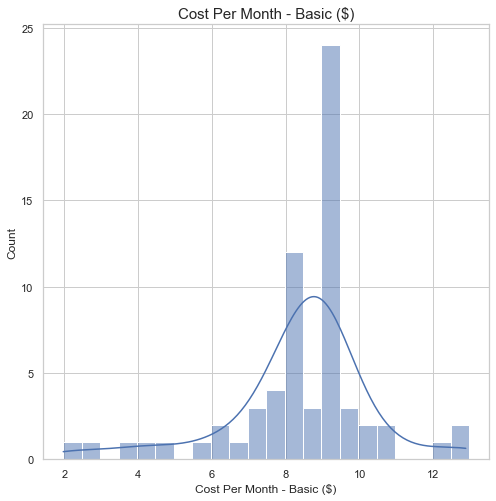

In [19]:
fig_dims = (8,8)
fig, ax = plt.subplots(figsize=fig_dims)

sns.histplot(data=netflix_df, x="Cost Per Month - Basic ($)",kde=True,binwidth=0.5)
plt.title("Cost Per Month - Basic ($)", fontsize=15)

Text(0.5, 1.0, 'Cost Per Month - Standard ($)')

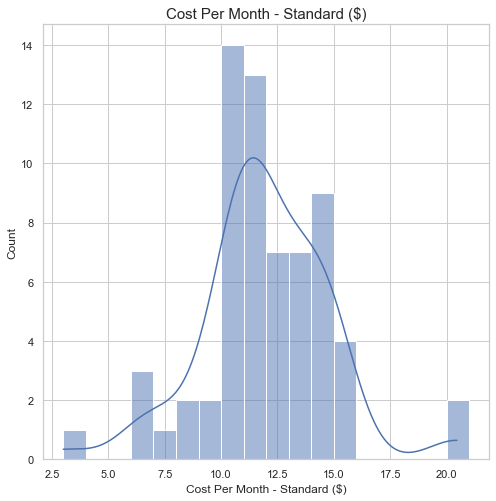

In [20]:
fig_dims = (8,8)
fig, ax = plt.subplots(figsize=fig_dims)

sns.histplot(data=netflix_df, x="Cost Per Month - Standard ($)",kde=True,binwidth=1)
plt.title("Cost Per Month - Standard ($)", fontsize=15)

Text(0.5, 1.0, 'Cost Per Month - Premium ($)')

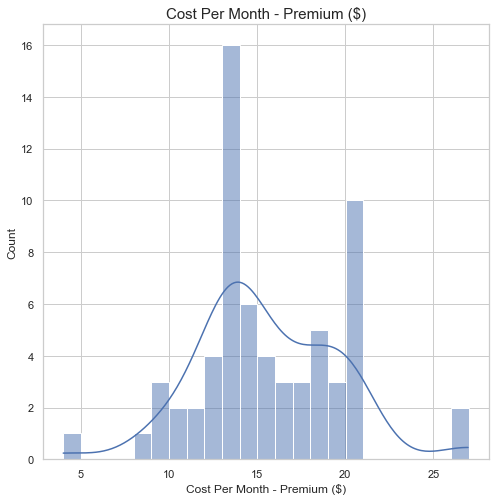

In [21]:
fig_dims = (8,8)
fig, ax = plt.subplots(figsize=fig_dims)

sns.histplot(data=netflix_df, x="Cost Per Month - Premium ($)",kde=True,binwidth=1)
plt.title("Cost Per Month - Premium ($)", fontsize=15)

In [22]:
netflix_subscription_stats_df = pd.DataFrame(columns = ['Description', 'Country', 'Total Library Size', 'No. of TV Shows', 'No. of Movies','Cost Per Month - Basic ($)', 'Cost Per Month - Standard ($)','Cost Per Month - Premium ($)'])

#Highest basic cost per month
max_basic = netflix_df[netflix_df['Cost Per Month - Basic ($)'] == netflix_df['Cost Per Month - Basic ($)'].max()]
max_basic.insert(0, "Description", "Highest Subsription Costs", True)

#Smallest basic cost per month
min_basic = netflix_df[netflix_df['Cost Per Month - Basic ($)'] == netflix_df['Cost Per Month - Basic ($)'].min()]
min_basic.insert(0, "Description", "Lowest Subsription Costs", True)

#Highest standard cost per month
max_standard = netflix_df[netflix_df['Cost Per Month - Standard ($)'] == netflix_df['Cost Per Month - Standard ($)'].max()]
max_standard.insert(0, "Description", "Highest Standard Subsription", True)

#Smallest standard cost per month
min_standard = netflix_df[netflix_df['Cost Per Month - Standard ($)'] == netflix_df['Cost Per Month - Standard ($)'].min()]
min_standard.insert(0, "Description", "Lowest Standard Subsription", True)

#Highest premium cost per month
max_premium = netflix_df[netflix_df['Cost Per Month - Premium ($)'] == netflix_df['Cost Per Month - Premium ($)'].max()]
max_premium.insert(0, "Description", "Highest Premium Subsription", True)

#Smallest premium cost per month
min_premium = netflix_df[netflix_df['Cost Per Month - Premium ($)'] == netflix_df['Cost Per Month - Premium ($)'].min()]
min_premium.insert(0, "Description", "Lowest Premium Subsription", True)

#Adding columns to empty dataframe
netflix_subscription_stats_df = pd.concat([netflix_subscription_stats_df, max_basic, min_basic, max_standard, min_standard, max_premium, min_premium], axis=0)

#Removing extra columns
netflix_subscription_stats_df = netflix_subscription_stats_df[['Description', 'Country', 'Cost Per Month - Basic ($)', 'Cost Per Month - Standard ($)','Cost Per Month - Premium ($)']]

netflix_subscription_stats_df

,Description,Country,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
33,Highest Subsription Costs,Liechtenstein,12.88,20.46,26.96
56,Highest Subsription Costs,Switzerland,12.88,20.46,26.96
59,Lowest Subsription Costs,Turkey,1.97,3.00,4.02
33,Highest Standard Subsription,Liechtenstein,12.88,20.46,26.96
56,Highest Standard Subsription,Switzerland,12.88,20.46,26.96
59,Lowest Standard Subsription,Turkey,1.97,3.00,4.02
33,Highest Premium Subsription,Liechtenstein,12.88,20.46,26.96
56,Highest Premium Subsription,Switzerland,12.88,20.46,26.96
59,Lowest Premium Subsription,Turkey,1.97,3.00,4.02


As seen above, 
- <b>Liechtenstein</b> & <b>Switzerland</b> have the Highest Subscription Costs Overall 
- <b>Turkey</b> has the Lowest Suscription Costs Overall

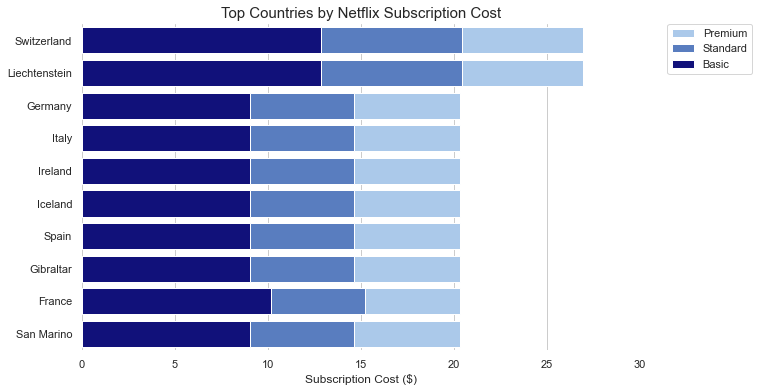

In [23]:
sns.set_theme(style="whitegrid")

fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)

#Creating a DataFrame with the Top 10 countires by Subscription Cost
top_cost = netflix_df.sort_values(by=['Cost Per Month - Premium ($)'], ascending=False).head(10)

sns.set_color_codes("pastel")
sns.barplot(x=top_cost['Cost Per Month - Premium ($)'], y=top_cost['Country'], data=top_lib, label="Premium", color="b")
plt.title("Top Countries by Netflix Subscription Cost", fontsize=15)

sns.set_color_codes("muted")
sns.barplot(x=top_cost['Cost Per Month - Standard ($)'], y=top_cost['Country'], data=top_lib, label="Standard", color="b")

sns.set_color_codes("pastel")
sns.barplot(x=top_cost['Cost Per Month - Basic ($)'], y=top_cost['Country'], data=top_lib, label="Basic", color="darkblue")

# Add a legend and informative axis label
ax.set(xlim=(0, 30), ylabel="", xlabel="Subscription Cost ($)")
sns.despine(left=True, bottom=True)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In the Top 10 countries by Subscription Cost we see that the subscription cost remains almost the same across tiers (except for Switzerland and Liechtenstein) 

## Region

In [24]:
netflix_region_df = netflix_df.groupby('Region')['Total Library Size'].mean().round()

#Converting the series netflix_region_df to a dataframe
netflix_region_df = netflix_region_df.to_frame()

#Identifying average number of TV shows offered in each region
netflix_region_df['Average No. of TV Shows'] = netflix_df.groupby('Region')['No. of TV Shows'].mean().round()

#Identifying average number of Movies offered in each region
netflix_region_df['Average No. of Movies'] = netflix_df.groupby('Region')['No. of Movies'].mean().round()

#Identifying average basic subscription cost in each region
netflix_region_df['Average Basic Subscription Cost ($)'] = netflix_df.groupby('Region')['Cost Per Month - Basic ($)'].mean().round(2)

#Identifying average standard subscription cost in each region
netflix_region_df['Average Standard Subscription Cost ($)'] = netflix_df.groupby('Region')['Cost Per Month - Standard ($)'].mean().round(2)

#Identifying average premium subscription cost in each region
netflix_region_df['Average Premium Subscription Cost ($)'] = netflix_df.groupby('Region')['Cost Per Month - Premium ($)'].mean().round(2)

#Identifying average value for money in each region
netflix_region_df['Average Value for Money'] = netflix_df.groupby('Region')['Value for Money'].mean().round()

#Renaming columns
netflix_region_df.rename(columns={'Total Library Size':'Average Overall Library Size'}, inplace=True)

#The index for this dataframe contains the station names so we want to put that information in a seaprate column
#Resetting the index (also creates a new column called 'index')
netflix_region_df .reset_index(level=0, inplace=True)

netflix_region_df

,Region,Average Overall Library Size,Average No. of TV Shows,Average No. of Movies,Average Basic Subscription Cost ($),Average Standard Subscription Cost ($),Average Premium Subscription Cost ($),Average Value for Money
0,Africa,5736.0,3686.0,2050.0,6.26,10.05,12.58,916.0
1,Asia,5347.0,3377.0,1970.0,7.64,10.40,12.97,900.0
2,Europe,5361.0,3652.0,1709.0,9.23,13.30,17.55,599.0
3,North America,5299.0,3459.0,1840.0,8.08,11.88,15.20,661.0
4,Oceania,6099.0,4026.0,2072.0,8.32,12.32,16.66,736.0
5,South America,4927.0,3156.0,1771.0,6.71,9.62,12.56,802.0


### Content

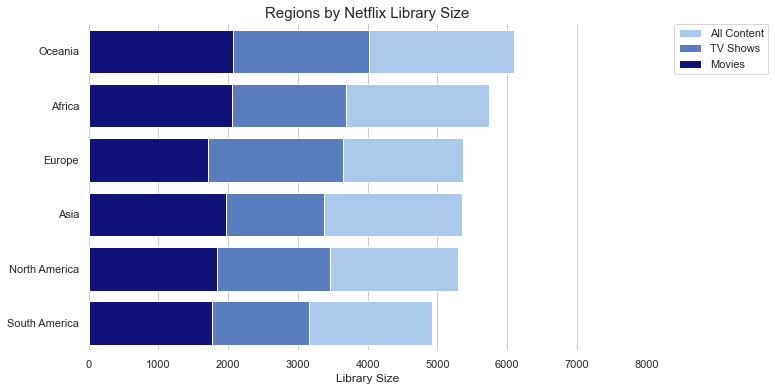

In [25]:
sns.set_theme(style="whitegrid")

fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)

#Creating a DataFrame with the Top 10 countires by library content
region_lib = netflix_region_df.sort_values(by=['Average Overall Library Size'], ascending=False).head(10)

sns.set_color_codes("pastel")
sns.barplot(x=region_lib['Average Overall Library Size'], y=region_lib['Region'], label="All Content", color="b")
plt.title("Regions by Netflix Library Size", fontsize=15)

sns.set_color_codes("muted")
sns.barplot(x=region_lib['Average No. of TV Shows'], y=region_lib['Region'], label="TV Shows", color="b")

sns.set_color_codes("pastel")
sns.barplot(x=region_lib['Average No. of Movies'], y=region_lib['Region'], label="Movies", color="darkblue")

# Add a legend and informative axis label
ax.set(xlim=(0, 8000), ylabel="", xlabel="Library Size")
sns.despine(left=True, bottom=True)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

- <b>Oceania</b> has the largest overall content library, TV Show & Movie Library
- <b>South America</b> has the smallest overall content library, TV Show & Movie Library

### Subscription Cost

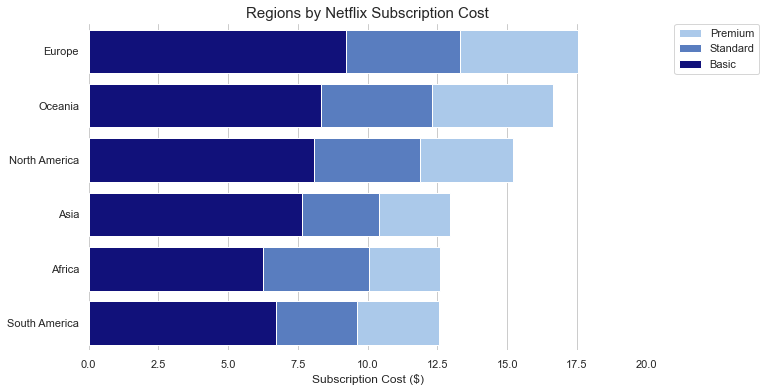

In [26]:
sns.set_theme(style="whitegrid")

fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)

#Creating a DataFrame with the countires by Subscription Cost
region_cost = netflix_region_df.sort_values(by=['Average Premium Subscription Cost ($)'], ascending=False)

sns.set_color_codes("pastel")
sns.barplot(x=region_cost['Average Premium Subscription Cost ($)'], y=region_cost['Region'], label="Premium", color="b")
plt.title("Regions by Netflix Subscription Cost", fontsize=15)

sns.set_color_codes("muted")
sns.barplot(x=region_cost['Average Standard Subscription Cost ($)'], y=region_cost['Region'], label="Standard", color="b")

sns.set_color_codes("pastel")
sns.barplot(x=region_cost['Average Basic Subscription Cost ($)'], y=region_cost['Region'], label="Basic", color="darkblue")

# Add a legend and informative axis label
ax.set(xlim=(0, 20), ylabel="", xlabel="Subscription Cost ($)")
sns.despine(left=True, bottom=True)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

- <b>Europe</b> has the largest overall subscription cost
- <b>South America</b> has the lowest standard and premium subscription cost
- <b>Africa</b> has the lowest basic subscription cost

## Value for Money

In [27]:
netflix_df['Value for Money'].describe().round().to_frame()

,Value for Money
count,65.0
mean,700.0
std,342.0
min,237.0
25%,555.0
50%,628.0
75%,753.0
max,2355.0


In [28]:
netflix_df[(netflix_df['Value for Money']==237)|(netflix_df['Value for Money']==2355)]

,Country_code,Country,Region,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),Value for Money
33,li,Liechtenstein,Europe,3048,1712,1336,12.88,20.46,26.96,237.0
59,tr,Turkey,Asia,4639,2930,1709,1.97,3.00,4.02,2355.0


The average Netflix customer has access to <b>700 TV Shows and Movies</b> for every dollar spent on their subscription.
- 75% of customers ss to <b>753 TV Shows and Movies</b> for every dollar spent on their subscription, which is just above average.
- On the high end, customers in certain countries have access to <b>2355 TV Shows and Movies</b> for every dollar spent on their subscription.
- On the low end, customers in certain countries have access to <b>237 TV Shows and Movies</b> for every dollar spent on their subscription.

Therefore, a cutomer in Turkey country is getting <b>10 times the value</b> from their Netflix subscription compared to a customer in Liechtenstein

Text(0.5, 1.0, 'Top Countries by Customer Value for Money')

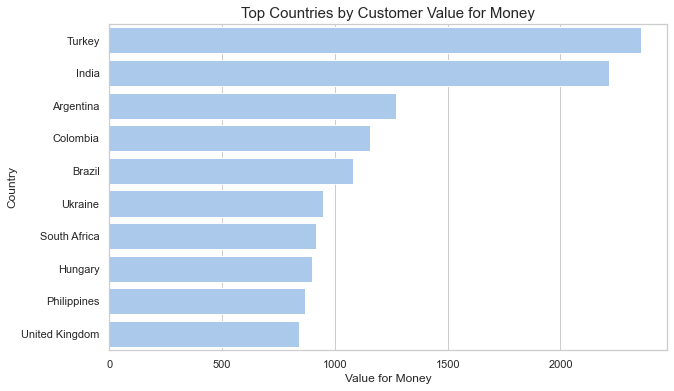

In [29]:
sns.set_theme(style="whitegrid")

fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)

#Creating a DataFrame with the countires by Subscription Cost
value = netflix_df.sort_values(by=['Value for Money'], ascending=False).head(10)

sns.set_color_codes("pastel")
sns.barplot(x=value['Value for Money'], y=value['Country'], color="b")
plt.title("Top Countries by Customer Value for Money", fontsize=15)

Customers in <b>Turkey</b> and <b>India</b> have the greatest value for money for their Basic Netflix Subscription

Text(0.5, 1.0, 'Top Countries by Lowest Customer Value for Money')

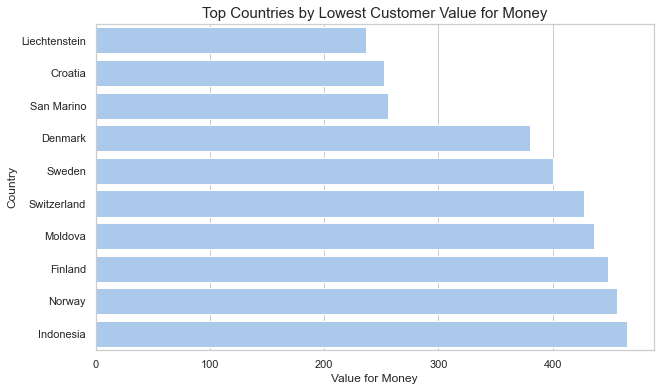

In [30]:
sns.set_theme(style="whitegrid")

fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)

#Creating a DataFrame with the countires by Subscription Cost
value = netflix_df.sort_values(by=['Value for Money'], ascending=True).head(10)

sns.set_color_codes("pastel")
sns.barplot(x=value['Value for Money'], y=value['Country'], color="b")
plt.title("Top Countries by Lowest Customer Value for Money", fontsize=15)

Customers in <b>Liechtenstein, Croatia and San Marino</b> have the least value for money for their Basic Netflix Subscription

### Region

Text(0.5, 1.0, 'Customer Value for Money by Region')

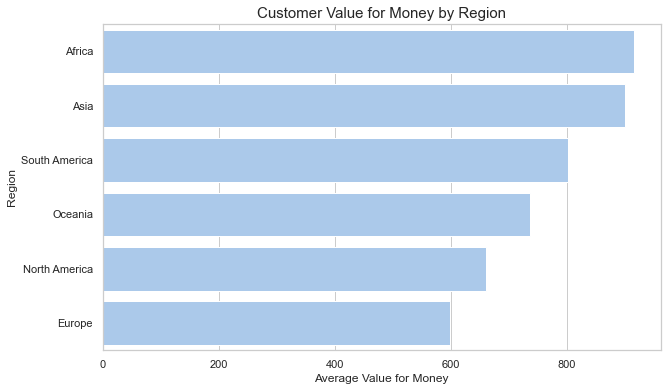

In [31]:
sns.set_theme(style="whitegrid")

fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)

#Creating a DataFrame with the countires by Subscription Cost
value_region = netflix_region_df.sort_values(by=['Average Value for Money'], ascending=False)

sns.set_color_codes("pastel")
sns.barplot(x=value_region['Average Value for Money'], y=value_region['Region'], color="b")
plt.title("Customer Value for Money by Region", fontsize=15)

- Customers in <b>Africa and Asia</b> have the greatest value for money for their Basic Netflix Subscription
- Customers in <b>Europe</b> have the least value for money for their Basic Netflix Subscription

### Content vs. Subscription 

Another way to determine the customer's value for money is to look at countries where customers get access to above average library size and below average basic subsciption cost.

In [32]:
#Identifying countries with below average basic cost and above average library size
highlight = netflix_df[(netflix_df['Cost Per Month - Basic ($)']<netflix_df['Cost Per Month - Basic ($)'].mean())&(netflix_df['Total Library Size']>netflix_df['Total Library Size'].mean())]

len(highlight)

10

We have <b>10 countries</b> where customers get access to above average library size and below average basic subsciption cost.

Text(0.5, 1.0, 'Content vs. Subsciption Cost')

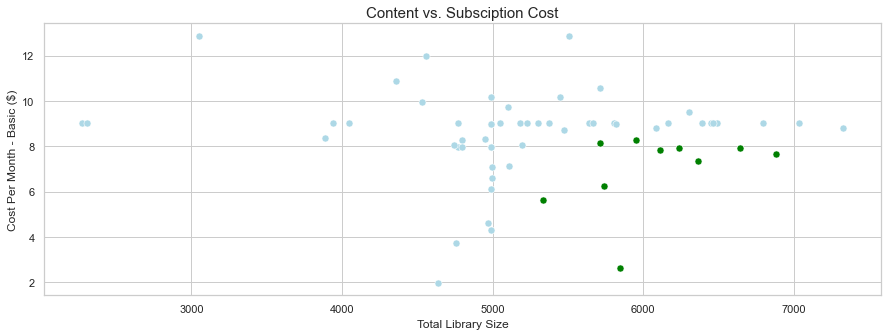

In [33]:
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)

sns.scatterplot(x='Total Library Size',y='Cost Per Month - Basic ($)', data=netflix_df, s=50, color="lightblue")
sns.scatterplot(x='Total Library Size',y='Cost Per Month - Basic ($)', data=highlight, s=50, color="green")

plt.title("Content vs. Subsciption Cost",fontsize=15)

Points highlighted in <b>green</b> indicate countries with access to an above average library size at a below average basic subscription cost. 

In [34]:
#Identifying the top 3 countries by Total Library Size
highlight.sort_values(by=['Total Library Size'], ascending=True).head(3)

,Country_code,Country,Region,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),Value for Money
60,ua,Ukraine,Europe,5336,3261,2075,5.64,8.46,11.29,946.0
48,ru,Russia,Europe,5711,3624,2087,8.13,10.84,13.56,702.0
52,za,South Africa,Africa,5736,3686,2050,6.26,10.05,12.58,916.0


In [35]:
#Identifying the top 3 countries by Basic Subscription Cost
highlight.sort_values(by=['Cost Per Month - Basic ($)'], ascending=True).head(3)

,Country_code,Country,Region,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),Value for Money
26,in,India,Asia,5843,3718,2125,2.64,6.61,8.60,2213.0
60,ua,Ukraine,Europe,5336,3261,2075,5.64,8.46,11.29,946.0
52,za,South Africa,Africa,5736,3686,2050,6.26,10.05,12.58,916.0


In terms of Content, the top 3 countries for customers are <b> Ukraine, Russia and South Africa</b> 

In terms of Basic Subscription Cost, the top 3 countries for customers are <b> India, Ukraine and South Africa</b> 

Taking both Content and Subscription Cost into consideration <b>Ukrainian and South African</b> Customers receive the most value for their Netflix Subscription.

# Summary of Netflix Data

We have data on <b>65</b> countries where Netflix operates across <b>6 regions</b>.

In terms of number of countries served,
- <b>Europe</b> represents the biggest region for Netlfix
- <b>Africa</b> represents the smallest region for Netlfix

## Content

- The average library size is <b>5314</b> with an average of <b>3519 TV Shows</b> and <b>1795 Movies</b>
- The content library size varies between <b>2274 and 7425</b>, which indicates that there is a significant difference in what content a netflix customer can see based on where they are accessing Netflix from. 
- <b>75% of customers</b> have access to a library of at least <b>4948 TV Shows and Movies</b>.

Based on the data we can say that the majority of Netflix's content in any given country consists of TV Shows.
- The standard deviation in TV Shows available is 723, while the standard deviation in Movies available is 327 
- Therefore, Movies available to users in different countries vary by a smaller margin than TV Shows avaialable to users in different countries. 
- TV Shows are the main differentiator in terms of content between each country. 

## Subscription Cost 

- The average subscription cost for different tiers is as follows:
    - Basic: <b>8.37</b>
    - Standard: <b>11.99</b>
    - Premium: <b>15.61</b>
    
The cost of a customer's Netflix subscription tier increases by as much as $22.94 if they relocate to a different country. 

## Value for Money

The average Netflix customer has access to <b>700 TV Shows and Movies</b> for every dollar spent on their subscription.
- 75% of customers ss to <b>753 TV Shows and Movies</b> for every dollar spent on their subscription, which is just above average.
- On the high end, customers in certain countries have access to <b>2355 TV Shows and Movies</b> for every dollar spent on their subscription.
- On the low end, customers in certain countries have access to <b>237 TV Shows and Movies</b> for every dollar spent on their subscription.

Thereofore, the disparity between the value a customer experiences from country to country may be almost <b>as high as 10 times the value for money</b>

## Regional Breakdown

### Europe

<u>Content</u>: European countries on average have access to the <i>3rd largest content library</i>, only slightly bigger than Asian countries.

<u>Subscription Cost and Value for Money</u>: Customers experience the <i>least value for money</i> for their Basic Netflix Subscription despite the fact that it has the <i>highest overall subscription cost</i>

<u>Country Details</u>:
- <b>Czechia</b> has the Largest Content Library Overall and the Largest Library of TV Shows
- <b>Croatia</b> has the Smallest Content Library Overall and the Smallest Library of TV Shows
- <b>San Marino</b> has the Smallest Library of Movies
- <b>Liechtenstein</b> has the Highest Subscription Costs Overall and customers in <b>Liechtenstein</b> experience the least value for money for their Basic Netflix Subscription
- Taking both Content and Subscription Cost into consideration, customers in <b>Ukraine</b> receive the most value for their Basic Netflix Subscription.

### Asia
<u>Content</u>: Asian countries on average have access to the <i>4rd largest content library</i>

<u>Subscription Cost and Value for Money</u>: Customers experience the <i>2nd highest value for money</i> for their Basic Netflix Subscription and have the <i> 4th highest overall subscription cost</i>

<u>Country Details</u>:
- <b>Malaysia</b> has the Largest Library of Movies
- <b>Turkey</b> has the Lowest Suscription Costs Overall
- Taking purely just value for money into consideration, customers in <b>Turkey</b> receive the greatest value for money for their Basic Netflix Subscription


### Africa
<u>Content</u>: African countries on average have access to the <i>2nd largest content library</i>

<u>Subscription Cost and Value for Money</u>: Customers experience the <i>greatest value for money</i> for their Basic Netflix Subscription and it has the <i>lowest basic subscription cost</i>

### North America
<u>Content</u>: North American countries on average have access to the <i>2nd smallest overall content library</i>

<u>Subscription Cost and Value for Money</u>:Customers experience the <i>2nd lowest value for money</i> for their Basic Netflix Subscription and it has the <i>3rd highest overall subscription cost</i>. 

### South America
<u>Content</u>: South American Countries on average have access to the <i>smallest overall content library</i>

<u>Subscription Cost and Value for Money</u>: Customers experience the <i>3rd highest value for money</i> for their Basic Netflix Subscription and it has the <i>lowest overall subscription cost</i>. 

### Oceania
<u>Content</u>: Oceanian countries on average have access to the <i>largest overall content library</i>

<u>Subscription Cost and Value for Money</u>: Customers experience the <i>4th highest value for money</i> for their Basic Netflix Subscription and it has the <i>2nd highest overall subscription cost</i>. 

# Where do Netflix customers experience the highest satisfaction?

A Netflix customer's primary concern is determining a balance between the value of entertainment and the cost of that entertainment. Ideally, the customer is seeking to pay the lowest amount possible for access to the most content. Based on the information above we can see that Cutomers in Africa would experience the most satisfaction for three key reasons:

<u>Content</u>: Access to the <i>2nd largest content library</i><br>
<u>Subscription Cost</u>: It has the <i>lowest basic subscription cost</i><br>
<u>Value for Money</u>: Region with the <i>greatest value for money</i> 

In particular, <b>South Africa</b>, which ranks 3rd in terms of above average access to content and below average basic subscription cost is the best location for Netflix Customers.

<b>Additional Data necessary</b><br>
The data only tells how much content is available to customers in each country and how much the different subscription tiers cost. For a holistic comparison, we need to consider factors such as 
- Number of customers in each country
- Number of customers actively using Netflix in each country (including Total hours of content watched, frequency of use etc.)
- Details on the type of content available
- Details on customer preferences (in terms of content)<br>
- And much more...

Together this data can help paint a detailed picture of what customers enjoy the most and where the most satisfied customers may be located. 
